Load Crop Data Layer for Marathon County Wisconsin

In [1]:
import os

### Set your directory to run

In [2]:
os.chdir("C:/Users/asbeg/Box/Data Sciencew/Final Project/WQinWI")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import pyproj
import rasterio
import rasterstats
import pandas as pd
import json
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.colors as pltc
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterstats import zonal_stats

In [ ]:

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

### Set CRS' equal to eachother

In [ ]:
marathon_muni = geopandas.read_file("MUNIBoundary.shp")

In [ ]:
marathon_muni.plot

In [ ]:
r20 = rasterio.open("CDL_Marathon_2020.tif")

In [ ]:
plt.imshow(r20.read(1))

In [10]:
r20.crs==marathon_muni.crs

False

In [11]:
marathon_muni = marathon_muni.to_crs(r20.crs)

In [12]:
marathon_muni.plot

In [13]:
marathon_muni.crs==r20.crs

True

### Plot Raster w/Counties

Text(0.5, 1.0, '2020')

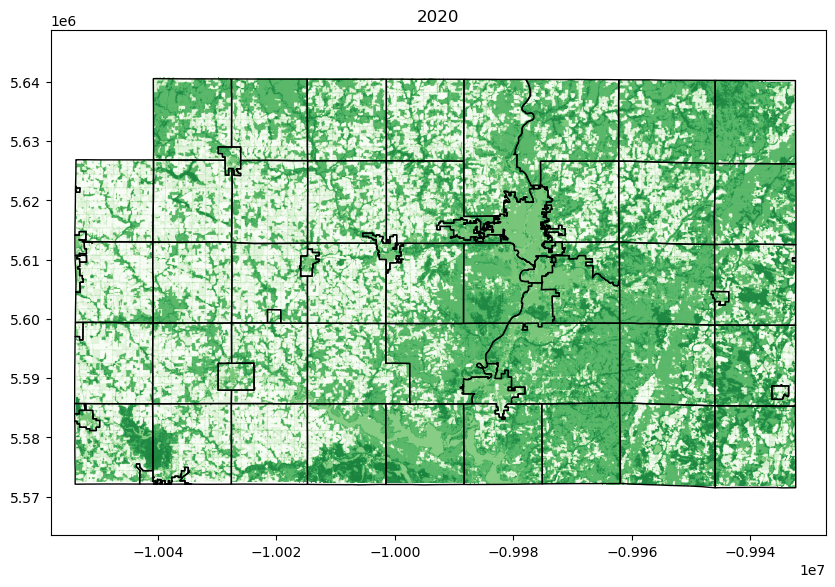

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
show(r20, ax=ax,cmap="Greens")
marathon_muni.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_title("2020")



### Create Dictionary

In [15]:
pixel_names = {
    "1": "Corn",
    "2": "Cotton",
    "3": "Rice",
    "4": "Sorghum",
    "5": "Soybeans",
    "6": "Sunflower",
    "10": "Peanuts",
    "11": "Tobacco",
    "12": "Sweet Corn",
    "13": "Pop or Orn Corn",
    "14": "Mint",
    "21": "Barley",
    "22": "Durum Wheat",
    "23": "Spring Wheat",
    "24": "Winter Wheat",
    "25": "Other Small Grains",
    "26": "Dbl Crop WinWht/Soybeans",
    "27": "Rye",
    "28": "Oats",
    "29": "Millet",
    "30": "Speltz",
    "31": "Canola",
    "32": "Flaxseed",
    "33": "Safflower",
    "34": "Rape Seed",
    "35": "Mustard",
    "36": "Alfalfa",
    "37": "Other Hay/Non Alfalfa",
    "38": "Camelina",
    "39": "Buckwheat",
    "41": "Sugarbeets",
    "42": "Dry Beans",
    "43": "Potatoes",
    "44": "Other Crops",
    "45": "Sugarcane",
    "46": "Sweet Potatoes",
    "47": "Misc Vegs & Fruits",
    "48": "Watermelons",
    "49": "Onions",
    "50": "Cucumbers",
    "51": "Chick Peas",
    "52": "Lentils",
    "53": "Peas",
    "54": "Tomatoes",
    "55": "Caneberries",
    "56": "Hops",
    "57": "Herbs",
    "58": "Clover/Wildflowers",
    "59": "Sod/Grass Seed",
    "60": "Switchgrass",
    "61": "Fallow/Idle Cropland",
    "63": "Forest",
    "64": "Shrubland",
    "65": "Barren",
    "66": "Cherries",
    "67": "Peaches",
    "68": "Apples",
    "69": "Grapes",
    "70": "Christmas Trees",
    "71": "Other Tree Crops",
    "72": "Citrus",
    "74": "Pecans",
    "75": "Almonds",
    "76": "Walnuts",
    "77": "Pears",
    "81": "Clouds/No Data",
    "82": "Developed",
    "83": "Water",
    "87": "Wetlands",
    "88": "Nonag/Undefined",
    "92": "Aquaculture",
    "111": "Open Water",
    "112": "Perennial Ice/Snow",
    "121": "Developed/Open Space",
    "122": "Developed/Low Intensity",
    "123": "Developed/Med Intensity",
    "124": "Developed/High Intensity",
    "131": "Barren",
    "141": "Deciduous Forest",
    "142": "Evergreen Forest",
    "143": "Mixed Forest",
    "152": "Shrubland",
    "176": "Grassland/Pasture",
    "190": "Woody Wetlands",
    "195": "Herbaceous Wetlands",
    "204": "Pistachios",
    "205": "Triticale",
    "206": "Carrots",
    "207": "Asparagus",
    "208": "Garlic",
    "209": "Cantaloupes",
    "210": "Prunes",
    "211": "Olives",
    "212": "Oranges",
    "213": "Honeydew Melons",
    "214": "Broccoli",
    "215": "Avocados",
    "216": "Peppers",
    "217": "Pomegranates",
    "218": "Nectarines",
    "219": "Greens",
    "220": "Plums",
    "221": "Strawberries",
    "222": "Squash",
    "223": "Apricots",
    "224": "Vetch",
    "225": "Dbl Crop WinWht/Corn",
    "226": "Dbl Crop Oats/Corn",
    "227": "Lettuce",
    "228": "Dbl Crop Triticale/Corn",
    "229": "Pumpkins",
    "230": "Dbl Crop Lettuce/Durum Wht",
    "231": "Dbl Crop Lettuce/Cantaloupe",
    "232": "Dbl Crop Lettuce/Cotton",
    "233": "Dbl Crop Lettuce/Barley",
    "234": "Dbl Crop Durum Wht/Sorghum",
    "235": "Dbl Crop Barley/Sorghum",
    "236": "Dbl Crop WinWht/Sorghum",
    "237": "Dbl Crop Barley/Corn",
    "238": "Dbl Crop WinWht/Cotton",
    "239": "Dbl Crop Soybeans/Cotton",
    "240": "Dbl Crop Soybeans/Oats",
    "241": "Dbl Crop Corn/Soybeans",
    "242": "Blueberries",
    "243": "Cabbage",
    "244": "Cauliflower",
    "245": "Celery",
    "246": "Radishes",
    "247": "Turnips",
    "248": "Eggplants",
    "249": "Gourds",
    "250": "Cranberries",
    "254": "Dbl Crop Barley/Soybeans",
    "255": "No Data"
    }


In [16]:
r20_array = r20.read(1)

### Flatten raster and fill in empty cell values

In [17]:
r20_array = r20.read(1)


pixels20 = pd.Series(r20_array.flatten())
pixels20 = pixels20[pixels20!=0]
pixel_counts = pixels20.value_counts()


pixel_counts = pd.concat([pixel_counts],axis=1).fillna(0)

pixel_counts.columns = [2020]

### Add crop names and sort in ascending order

In [18]:
pixel_counts_disagg = pixel_counts.reset_index()

pixel_counts_disagg['index'] = pixel_counts_disagg['index'].astype(str).replace(pixel_names)

pixel_counts_disagg = pixel_counts_disagg.set_index("index")

pixel_pcts_disagg = pixel_counts_disagg.sort_values(by=2020,ascending=False)/pixel_counts_disagg[2020].sum()*100

In [19]:
pixel_pcts_disagg.head(10)

,2020
index,
No Data,26.912371
Deciduous Forest,20.495176
Woody Wetlands,10.809954
Corn,10.064727
Alfalfa,7.050639
Other Hay/Non Alfalfa,4.944040
Mixed Forest,4.425904
Soybeans,4.059859
Developed/Open Space,2.751342


Aggregate pixels into groups

In [20]:
pixel_counts_agg = pixel_counts.reset_index()
pixel_counts_agg['label'] = pixel_counts_agg['index'].astype(str).replace(pixel_names)
pixel_counts_agg['index'] = pixel_counts_agg['index'].astype(int)


### Aggergate by CDL defined categories

In [21]:
pixel_counts_agg['agg_label'] = pixel_counts_agg['label']
pixel_counts_agg.loc[pixel_counts_agg['index']<60,"agg_label"]= "Crop"
pixel_counts_agg.loc[(pixel_counts_agg['index']>=61)&(pixel_counts_agg['index']<66),"agg_label"]= "Non-Crop"
pixel_counts_agg.loc[(pixel_counts_agg['index']>=66)&(pixel_counts_agg['index']<=80),"agg_label"]= "Crop"
pixel_counts_agg.loc[(pixel_counts_agg['index']>=81)&(pixel_counts_agg['index']<110),"agg_label"]= "Other"
pixel_counts_agg.loc[(pixel_counts_agg['index']>=110)&(pixel_counts_agg['index']<195),"agg_label"]= "NLCD_Derived Classes"
pixel_counts_agg.loc[(pixel_counts_agg['index']>=195)&(pixel_counts_agg['index']<255),"agg_label"]= "Crop"
pixel_counts_agg.loc[(pixel_counts_agg['index']==255),"agg_label"]= "No Data"

In [50]:
pixel_counts_agg_sum = pixel_counts_agg.groupby("agg_label")[2020].sum()
agg_label = pd.DataFrame(pixel_counts_agg_sum)

In [59]:
agg_label["Crop"] = agg_label.index

In [68]:
agg_crop = agg_label["Crop"]
agg_count = agg_label[2020]

### Plot out aggregated land use groups

Text(0.5, 1.0, '2020 Aggregated Landuse in Marathon County')

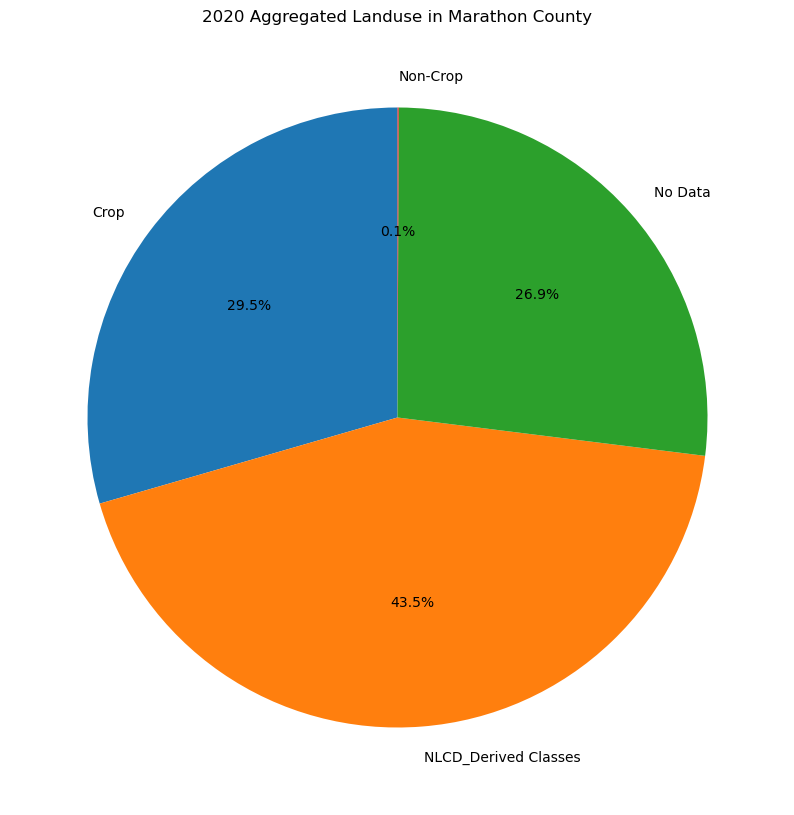

In [69]:

f,ax = plt.subplots(figsize=(10,20))
ax.set_ylabel("")
ax.pie(agg_count,labels=agg_crop, autopct='%1.1f%%', startangle=90)
plt.title("2020 Aggregated Landuse in Marathon County")

### show what the top 10 land uses are in each group

In [70]:

crop_pixels_crop = pixel_counts_agg[pixel_counts_agg.agg_label=="Crop"]
crop_pixels_other = pixel_counts_agg[pixel_counts_agg.agg_label=="Non-Crop"]
crop_pixels_NLCD_Derived = pixel_counts_agg[pixel_counts_agg.agg_label=="NLCD_Derived Classes"]
crop_pixels_crop = crop_pixels_crop.set_index("label").sort_values(by=2020,ascending=False)
crop_pixels_other = crop_pixels_other.set_index("label").sort_values(by=2020,ascending=False)
crop_pixels_NLCD_Derived = crop_pixels_NLCD_Derived.set_index("label").sort_values(by=2020,ascending=False)

top10_crop = crop_pixels_crop.head(7).index
top7_other = crop_pixels_other.head(7).index
top7_NLCD_Derived = crop_pixels_NLCD_Derived.head(7).index

In [71]:
#create a subgroup so i can plot out top land uses in each group
crop20 = crop_pixels_crop[crop_pixels_crop.index.isin(top10_crop)][2020]
other20 = crop_pixels_other[crop_pixels_other.index.isin(top7_other)][2020]
NLCD20 = crop_pixels_NLCD_Derived[crop_pixels_NLCD_Derived.index.isin(top7_NLCD_Derived)][2020]

Text(0.5, 1.0, 'NLCD-Derived 2020')

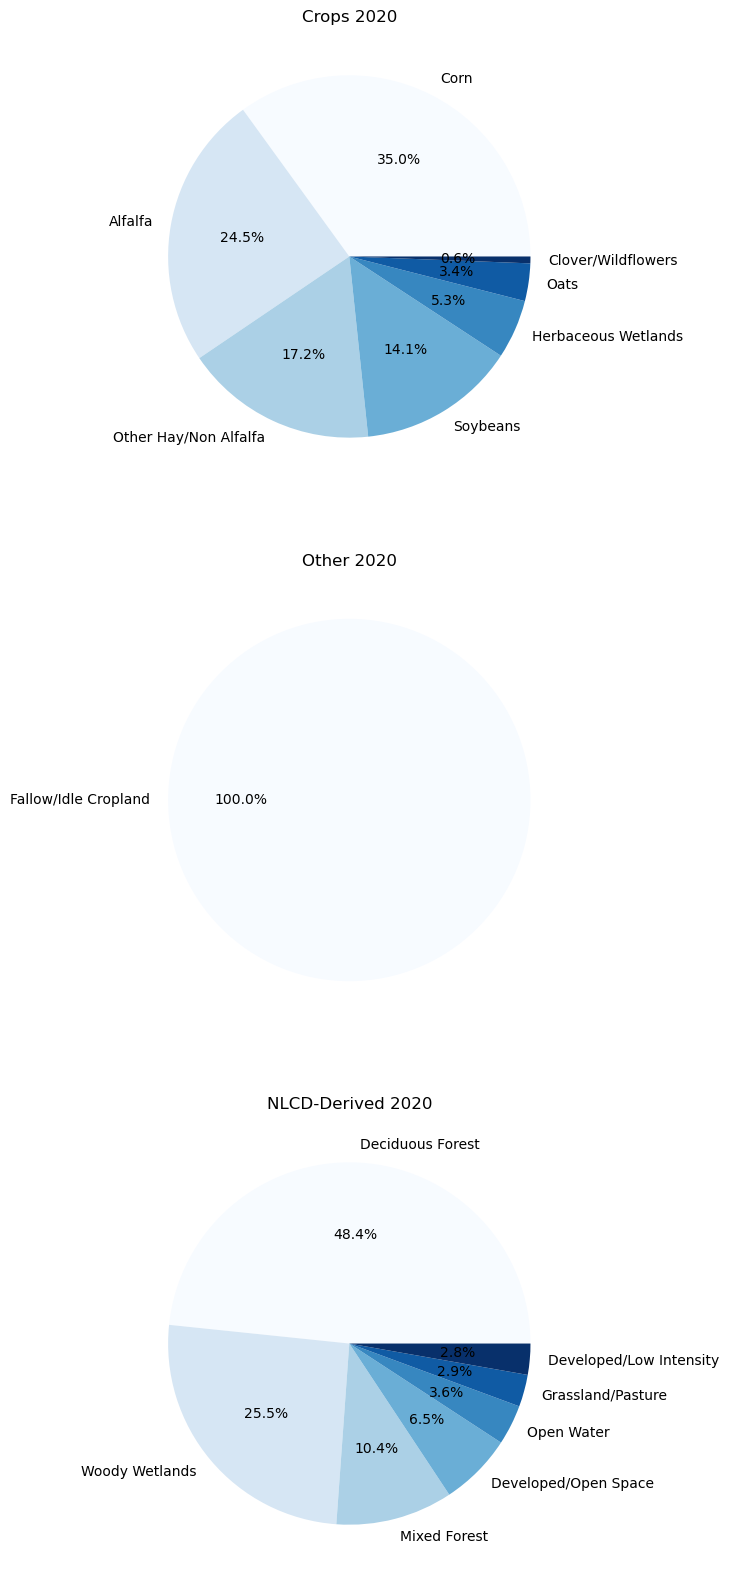

In [72]:
#Create pie charts for disaggregated uses

f,a = plt.subplots(3,1,figsize=(10,20))

crop20.plot(ax=a[0],kind="pie",autopct='%1.1f%%',cmap="Blues")
a[0].set_ylabel("")
a[0].set_title("Crops 2020")

other20.plot(ax=a[1],kind="pie",autopct='%1.1f%%',cmap="Blues")
a[1].set_ylabel("")
a[1].set_title("Other 2020")

NLCD20.plot(ax=a[2],kind="pie",autopct='%1.1f%%',cmap="Blues")
a[2].set_ylabel("")
a[2].set_title("NLCD-Derived 2020")


### Read in shapefile and set CRS equal to raster

In [26]:

fpp_data = geopandas.read_file("FPPActiveData.shp")




In [27]:
#check crs' match up
fpp_data.crs==marathon_muni.crs

False

In [28]:
fpp_data = fpp_data.to_crs(r20.crs)

In [29]:
fpp_data.crs==marathon_muni.crs

True

In [31]:
crop_data = rasterio.open("CDL_Marathon_2020.tif")

### Find CDL intersection with Nutrient Management Plan Rasters

In [ ]:
fpp_data = fpp_data.to_crs(r20.crs)
fpp_data['cropdata'] = zonal_stats(fpp_data.geometry, r20.read(1), nodata=-999, categorical=True, category_map=pixel_names,affine=crop_data.transform)
crop_df = pd.DataFrame(fpp_data['cropdata'].tolist(), index=fpp_data.index)

In [33]:
#count up the number of pixels of each crop in the raster and then sort them in descending order
crop_counts = crop_df.apply(pd.Series.value_counts).fillna(0).astype(int).sum(axis=0).sort_values(ascending=False)

### Add Crop Labels

In [35]:
crop_counts_labeled = crop_counts.reset_index()

crop_counts_labeled['Crop'] = crop_counts_labeled['index'].astype(str).replace(pixel_names)

crop_counts_labeled.columns

Index(['index', 0, 'Crop'], dtype='object')

In [36]:
# Convert the list to a DataFrame with column names "Crop" and "Count"
df = pd.DataFrame(crop_counts_labeled, columns=["Crop", 0])
df = df.drop(df.index[-1])

0     1373
1     1295
2     1137
3     1056
4      949
5      875
6      859
7      683
8      660
9      571
10     466
11     317
12     314
13     127
14     111
15      91
16      90
17      83
18      71
19      53
20      48
21      38
22      32
23      30
24      28
25      27
26      21
27      16
28      12
29      10
30       8
31       7
32       5
33       3
34       2
35       2
36       2
37       2
38       2
39       1
Name: 0, dtype: int64

### Create new dataframe for Top NMP crops, create new column for percentage of NMP in each disagregated category

In [37]:
Top_NMP_Crops = pd.DataFrame()

In [38]:
Top_NMP_Crops["Crop"] = df["Crop"]
Top_NMP_Crops["Pixel_Count"] = df[0]
Top_NMP_Crops["Percent_NMP_Crop"] = Top_NMP_Crops.Pixel_Count/Top_NMP_Crops.Pixel_Count.sum()*100

,Crop,Pixel_Count,Percent_NMP_Crop
0,Corn,1373,11.963057
1,Alfalfa,1295,11.283436
2,Other Hay/Non Alfalfa,1137,9.906770
3,Deciduous Forest,1056,9.201011
4,Soybeans,949,8.268711
5,Woody Wetlands,875,7.623944
6,Developed/Open Space,859,7.484534
7,Grassland/Pasture,683,5.951032
8,Mixed Forest,660,5.750632
9,Herbaceous Wetlands,571,4.975168


In [39]:
Top_10_NMP_Crops = Top_NMP_Crops.sort_values('Percent_NMP_Crop', ascending=False).head(10)
Top_10_NMP_Crops

,Crop,Pixel_Count,Percent_NMP_Crop
0,Corn,1373,11.963057
1,Alfalfa,1295,11.283436
2,Other Hay/Non Alfalfa,1137,9.906770
3,Deciduous Forest,1056,9.201011
4,Soybeans,949,8.268711
5,Woody Wetlands,875,7.623944
6,Developed/Open Space,859,7.484534
7,Grassland/Pasture,683,5.951032
8,Mixed Forest,660,5.750632
9,Herbaceous Wetlands,571,4.975168


### Display as pie chart

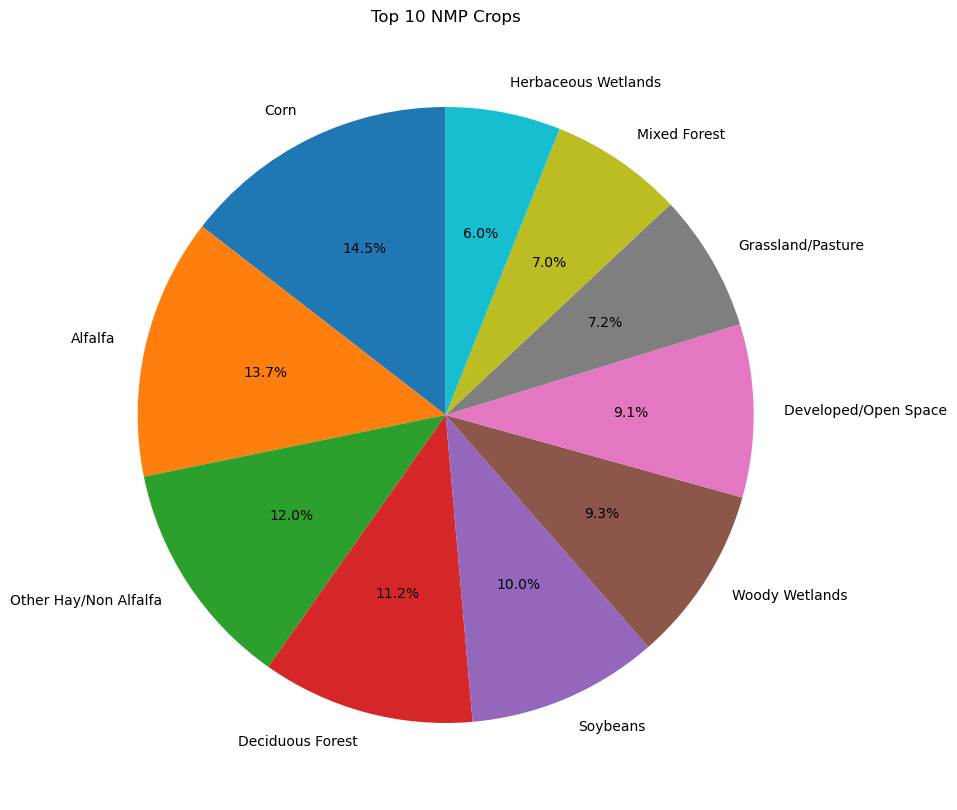

In [40]:

percent_nmp_crop = Top_10_NMP_Crops["Percent_NMP_Crop"]
crop = Top_10_NMP_Crops["Crop"]

# Create the pie chart
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(percent_nmp_crop, labels=crop, autopct='%1.1f%%', startangle=90)
ax.set_title("Top 10 NMP Crops")

# Show the plot
plt.show()